In [1]:
import json
import numpy as np
import pandas as pd
import os
import time

%pylab inline
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
plt.style.use('seaborn-poster')
sns.set(style='white', context='notebook', palette='deep')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('data/df.csv')
imgs = np.load('data/bitmap_imgs.npy')

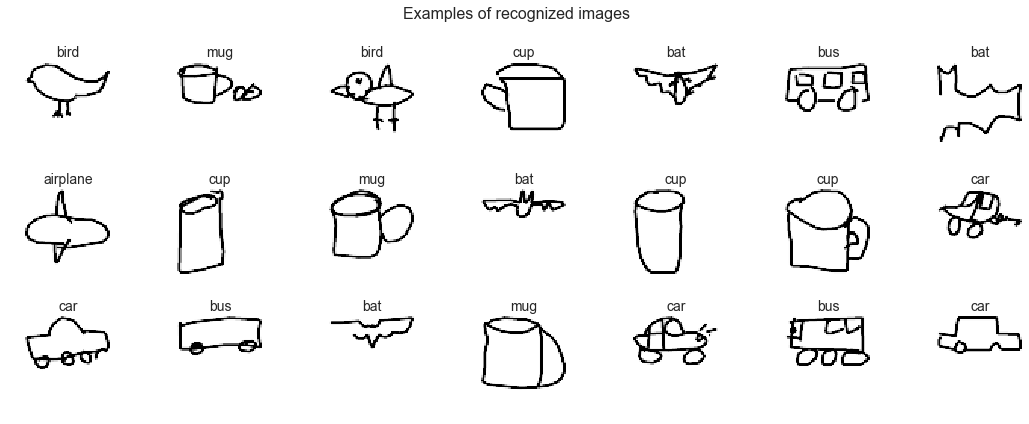

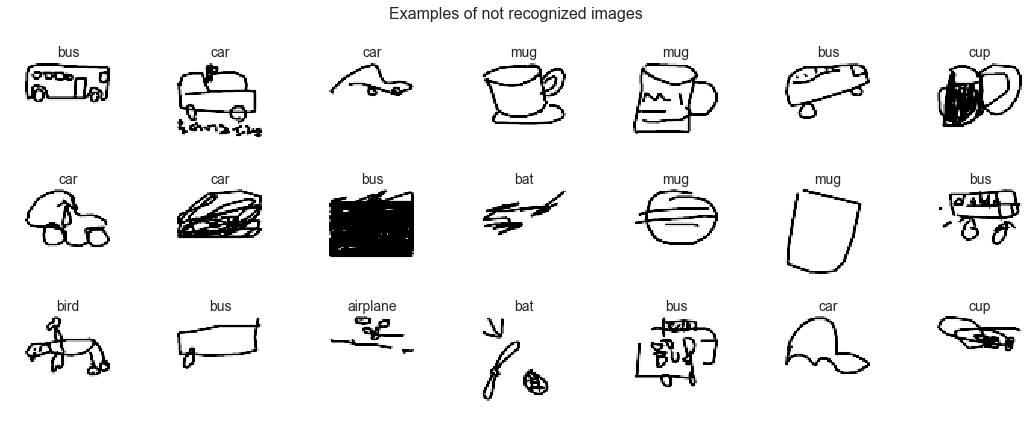

In [52]:
def plot_on_grid(title, recognized):
    fig = plt.figure(figsize=(15,6))
    fig.suptitle(title, fontsize=16)

    nrows, ncols = 3, 7
    img_ids = np.random.choice(df[df.recognized==recognized].index, nrows*ncols)
    for i in range(nrows * ncols):
        image_ind = img_ids[i]

        ax=fig.add_subplot(nrows, ncols, i+1)        
        ax.axis('off')
        ax.imshow(imgs[image_ind])
        ax.set_title(df.target.loc[image_ind], fontsize=14)

    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    plt.show()
    
plot_on_grid("Examples of recognized images", 1)
plot_on_grid("Examples of not recognized images", 0)

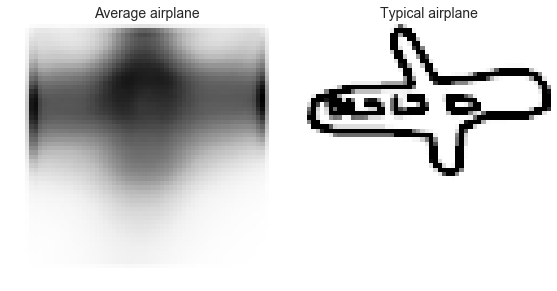

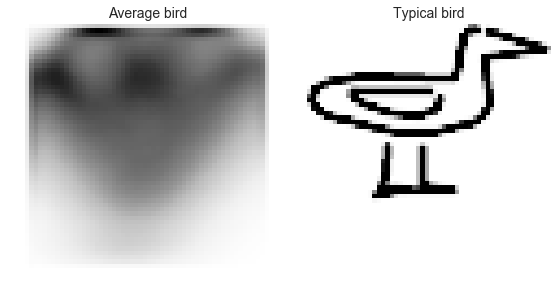

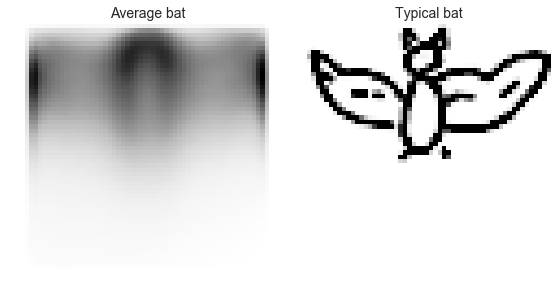

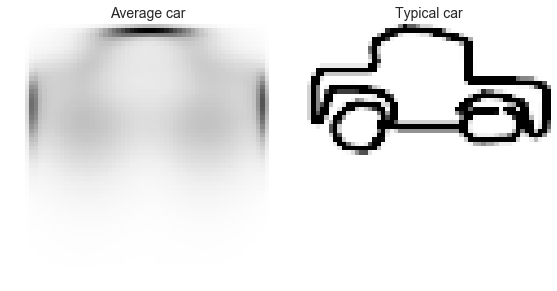

In [59]:
def plot_most_common(imgs, df, label):
    mask = df.target==label
    mean_img = imgs[mask].mean(axis=0)
    
    plt.subplots(figsize=(8,4))
    
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title('Average ' + label, fontsize=14)
    plt.imshow(mean_img)
    
    # Removes half-empty pictures.
    mask = (mask) & (imgs.mean(axis=(1,2)) >= mean_img.mean())
    diffs = np.sum(((mean_img - imgs[mask])**2), axis=(1,2))
    best_match_index = np.argmin(diffs)
    
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title('Typical ' + label, fontsize=14)
    plt.imshow(imgs[mask][best_match_index])
    plt.tight_layout()
    plt.show()
    
plot_most_common(imgs, df, 'airplane')
plot_most_common(imgs, df, 'bird')
plot_most_common(imgs, df, 'bat')
plot_most_common(imgs, df, 'car')

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=0.001, max_iter=500)#, multi_class='multinomial', solver='lbfgs', max_iter=500)
lr.fit(train.reshape(-1, 28*28), ytrain)

plt.imshow(lr.coef_[0].reshape(28,28))

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

le = LabelEncoder()
y = le.fit_transform(targets)
y = to_categorical(y).astype(int)
imgs = imgs.reshape(-1, 28, 28, 1)

train, valid, ytrain, yvalid = train_test_split(imgs, y, test_size = 0.25, random_state=0)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer = Adam(lr=1e-4),
              metrics=["accuracy"])

In [ ]:
model.summary()

In [ ]:
# history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (X_val,Y_val),
#                               verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
#                               , callbacks=[learning_rate_reduction])
#model.compile(optimizer = optimizer , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train, ytrain,
          batch_size=1024,
          epochs=50, verbose=1,
          validation_data=(
              valid, yvalid)
            )

In [ ]:
#model.save('nnet_v1.h5')
model.load_weights('nnet_v1.h5')

In [ ]:
import keras
model =  keras.models.load_model('nnet_v1.h5')

In [ ]:
np.save('classes.npy', le.classes_)
lec = np.load('classes.npy')

In [ ]:
lec

In [ ]:
from sklearn.metrics import confusion_matrix
y_hat = model.predict(valid)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(yvalid, axis=1)
confusion = np.array(confusion_matrix(y_true, y_pred))
print(confusion)

In [ ]:
sns.heatmap(confusion.astype('float') / confusion.sum(axis=1),
            fmt='.0%',
            annot=True, 
            xticklabels=list(le.classes_),
            yticklabels=list(le.classes_),
           )
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
mask = y_hat[range(y_hat.shape[0]), np.argmax(yvalid, axis=1)]>0.95

In [ ]:
i = 929
print(le.classes_[np.argmax(yvalid[mask][i])])
plt.imshow(valid[mask][i].reshape(28,28))

In [ ]:
plt.hist(y_hat[range(y_hat.shape[0]), np.argmax(yvalid, axis=1)], bins=np.arange(0,1,0.01));

In [ ]:
from PIL import Image
import PIL
import glob
import cv2

In [ ]:
img2 = img2 / 0

In [ ]:
img = Image.open('f1.jpg')

plt.imshow(img)
plt.show()

for resample in [PIL.Image.BOX, PIL.Image.BILINEAR, PIL.Image.HAMMING, PIL.Image.LANCZOS, 1,3, 5]:
    img2 = img.resize((28,28), resample=resample)
    img2 = np.array(img2)[:, :, 0].astype(float)
    img2 = - img2 + img2.max()
    img2 /= img2.max()/2
    img2 = img2.clip(0, 1)
    plt.imshow(img2)
    plt.show()
# plt.imshow(img)

In [ ]:
img = Image.open('f1.jpg')

for resample in [PIL.Image.HAMMING, PIL.Image.BOX, PIL.Image.LANCZOS,  1, 3, 5]:
    img2 = img.resize((28,28), resample=resample)
    img2 = np.array(img2)[:, :, 0].astype(float)
    img2 = - img2 + img2.max()
    img2 /= img2.max()/2
    img2 = img2.clip(0, 1)
    
    preds = model.predict(img2.reshape(1, 28, 28, 1))
    print(le.classes_[preds.argmax()], preds.max())
    print(preds)
    print()

In [ ]:
preds.sum()

In [ ]:
le.classes_

In [ ]:
all_categories = ['airplane', 'bat', 'bird', 'bus', 'car', 'cup', 'mug']
print('\n'.join(np.random.choice(all_categories, 5, False)))